### Load Excel Files for April

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np


april_file3 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 3', engine='pyxlsb')
april_file4 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 4', engine='pyxlsb')
april_file5 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 5', engine='pyxlsb')
april_file6 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 6', engine='pyxlsb')
april_file7 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 7', engine='pyxlsb')
april_file8 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 8', engine='pyxlsb')
april_file9 = pd.read_excel('APRIL_2022.xlsb', sheet_name='FILE 9', engine='pyxlsb')


In [3]:

april = pd.concat([april_file3, april_file4,april_file5,april_file6,april_file7,april_file8,april_file9], axis=0)

print(f"Number of rows: {len(april)}")

Number of rows: 15804


### Data Information

| Name                          | Remarks                               |
|-------------------------------|------------------------------         |
| lineItem/UsageAccountId       |Dev, Stg, Production                   |
| lineItem/ProductCode          |AWS Resources                          |
| lineItem/ResourceId[Optional] |Shows the arn                          |
| lineItem/UnblendedCost        |Shows the usage cost per resource      | 
| lineItem/LineItemType         |Tax, Savings etc.                      |



Exclude the following to get the most accurate value: 
- credit
- refund
- saving plan recurring fee
- saving plan negation
- tax
- edp




### Calculate Costs/Resource/Environment

In [4]:

env_dict = {116698182371: '3. Prod',    
900051432098: '1. Dev',    
729890003133: '2. Stg'}    

# transform column
april['lineItem/UsageAccountId'] = april['lineItem/UsageAccountId'].map(env_dict) 

resources_cost_env_unblended = april.groupby([
    'lineItem/ProductCode', 'lineItem/UsageAccountId'])["lineItem/UnblendedCost"].sum().reset_index()

resources_cost_env_unblended.pivot(columns='lineItem/ProductCode',
         index='lineItem/UsageAccountId',
         values='lineItem/UnblendedCost')


lineItem/ProductCode,AWSELB,AWSLambda,AmazonCloudWatch,AmazonEC2,AmazonECR,AmazonECS,AmazonRDS,AmazonS3
lineItem/UsageAccountId,,,,,,,,
1. Dev,181.457227,0.179759,1.146400,131.476670,1.698005,816.085798,950.034559,0.395421
2. Stg,54.450755,0.199525,0.901463,129.339565,0.606840,639.604585,1710.009065,0.002696
3. Prod,54.489718,NaN,0.655291,195.165075,0.294270,469.003528,83.985739,0.042266


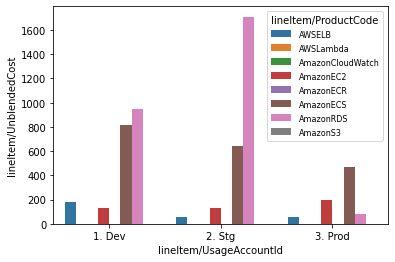

In [6]:

ax = sns.barplot(data=resources_cost_env_unblended,
            x='lineItem/UsageAccountId', y='lineItem/UnblendedCost', hue="lineItem/ProductCode")

plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='10')  # for legend title

plt.show()